In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

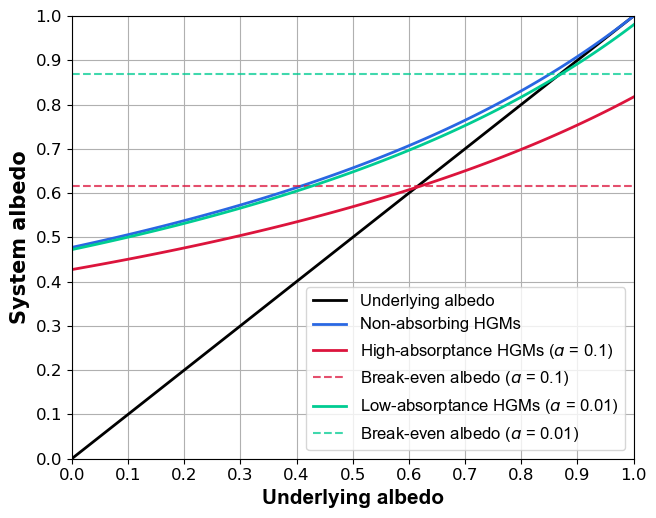

In [6]:
'''

Reproduce Figure 5a from Webster and Warren (2022) with updated absorptance value

'''

# make simple function for computing total system reflectivity (Eq. 1 in W&W)
r_system = lambda rg,tg,ri: rg+ri*tg**2/(1-ri*rg)

# define HGM optical properties for average day used by W&W
rg = 0.4272
tg = 0.4726

# define measured HGM abosrptance
ag_obs = 0.01

# make vector of possible ice albedo values
ri = np.linspace(0,1,100)

# calculate perturbation to above properties caused by observed absorptance and zero absorptance
res_obs = 1-(rg+tg+ag_obs)
res_non = 1-(rg+tg)

# compute r for original case in w&w, observed abosrptance, and non-absorbing case
r_orig = r_system(rg,tg,ri)
r_obs = r_system(rg+res_obs/2,tg+res_obs/2,ri)
r_non = r_system(rg+res_non/2,tg+res_non/2,ri)

# get break-even albedo
rb_orig = ri[np.where(r_orig < ri)[0][0]]
rb_obs = ri[np.where(r_obs < ri)[0][0]]

# make the simple plot
fig = plt.figure(figsize=(7.25,5.75))
plt.plot(ri,ri,c='k',label="Underlying albedo",linewidth=2)
plt.plot(ri,r_non,c='#2967E2',label="Non-absorbing HGMs",linewidth=2)
plt.plot(ri,r_orig,c='crimson',label=r"High-absorptance HGMs ($ɑ$ = 0.1)",linewidth=2)
plt.hlines([rb_orig],0,1,linestyles='--',colors='crimson',label=r"Break-even albedo ($ɑ$ = 0.1)",alpha=0.75)
plt.plot(ri,r_obs,c='#00CC92',label=r"Low-absorptance HGMs ($ɑ$ = 0.01)",linewidth=2)
plt.hlines([rb_obs],0,1,linestyles='--',colors='#00CC92',label=r"Break-even albedo ($ɑ$ = 0.01)",alpha=0.75)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xticks(np.linspace(0,1,11),fontsize=12)
plt.yticks(np.linspace(0,1,11),fontsize=12)
plt.xlabel("Underlying albedo",weight='bold',fontname="Arial",size=15)
plt.ylabel("System albedo",weight='bold',size=15)
plt.grid("on")
font = mpl.font_manager.FontProperties(family='Arial',style='normal', size=12)
plt.legend(prop=font,loc="lower right")
plt.savefig("../Figure_1.png",dpi=200)